In [1]:
%pip install numpy==2.2.3 pandas==2.2.3 matplotlib==3.10.0 seaborn==0.13.2 scipy==1.15.2 statsmodels==0.14.4

  Obtaining dependency information for numpy==2.2.3 from https://files.pythonhosted.org/packages/e5/5b/aaabbfc7060c5c8f0124c5deb5e114a3b413a548bbc64e372c5b5db36165/numpy-2.2.3-cp310-cp310-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------------ ------------------------- 20.5/60.8 kB 640.0 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 803.2 kB/s eta 0:00:00
  Obtaining dependency information for pandas==2.2.3 from https://files.pythonhosted.org/packages/31/9e/6ebb433de864a6cd45716af52a4d7a8c3c9aaf3a98368e61db9e69e69a9c/pandas-2.2.3-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for matplotlib==3.10.0 from https://files.pythonhosted.org/packages/5a/85/b9a54d64585a6b8737a78a61897450403c30f39e0bd3214270bb0b96f002/matplotlib-3.10.0-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for seaborn==0.13.2 from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Statistics** plays a crucial role in machine learning by providing the theoretical foundation and practical tools necessary for building robust and efficient models. It can also help in the preprocessing steps in machine learning, like gaining a better understanding of the data or feature engineering

**Probability** can help in understanding and quantifying the uncertainty associated with the predictions of a machine learning model.

# Descriptive Statistics








Descriptive statistics help summarize and organize data so that it can be easily understood. These statistics allow us to analyze data distributions and identify key characteristics of the data.

In [3]:
np.random.seed(42)

n = 1000

data = {
    'Age': np.random.randint(18, 70, n),
    'Salary': np.abs(np.random.normal(50000, 15000, n)),
    'Hours_Worked_Per_Week': np.random.randint(20, 60, n),
    'Years_of_Experience': np.random.lognormal(mean=1, sigma=0.7, size=n)
}

df = pd.DataFrame(data)

df.head()

,Age,Salary,Hours_Worked_Per_Week,Years_of_Experience
0,56,25903.305196,56,2.325089
1,69,53051.954538,23,7.712978
2,46,38654.738821,23,0.886359
3,32,28666.194356,39,1.522041
4,60,40301.406736,29,2.528741


## Measures of central tendency

These measures describe the center or typical value of a dataset: mean, median, mode...

In [4]:
print("Mean salary:", df['Salary'].mean().item())
print("Median salary:", df['Salary'].median().item())

Mean salary: 50863.622304299795
Median salary: 50807.53098571996


In [5]:
from scipy.stats import trim_mean
trim_mean(df['Salary'], 0.1)

np.float64(50788.51369800581)

In [6]:
df['Salary_With_Outliers'] = df['Salary']
n_outliers = 20
df.loc[np.random.choice(df.index, n_outliers), 'Salary_With_Outliers'] *= 10

print("Mean salary with outliers:", df['Salary_With_Outliers'].mean().item())
print("Median salary with outliers:", df['Salary_With_Outliers'].median().item())

Mean salary with outliers: 58875.73390408674
Median salary with outliers: 51170.02623472782


## Measures of dispersion

These measures describe how spread out the data is: range, variance, standard deviation, quantiles, interquantile range...

The **variance** measures how far each data point in a dataset is from the mean. It is defined as:

$$
\sigma^2 = \frac{1}{N} \sum_{i=1}^{N} (x_i - \bar{x})^2
$$

where:
- $x_i$ are the individual data points,
- $\bar{x}$ is the mean of the data points,
- $N$ is the total number of data points in the population,

The **standard deviation** is the square root of the variance. It is useful because it is expressed in the same units as the original data, making it easier to interpret.

In [7]:
df['Salary'].max() - df['Salary'].min()
df['Salary'].var()
df['Salary'].std()

np.float64(14823.245521256558)

**Quantiles** divide a probability distribution into continuous intervals with equal probabilities. There is one fewer quantile than the number of groups created. Common quantiles have special names, such as quartiles (four groups), deciles (ten groups), and percentiles (100 groups).

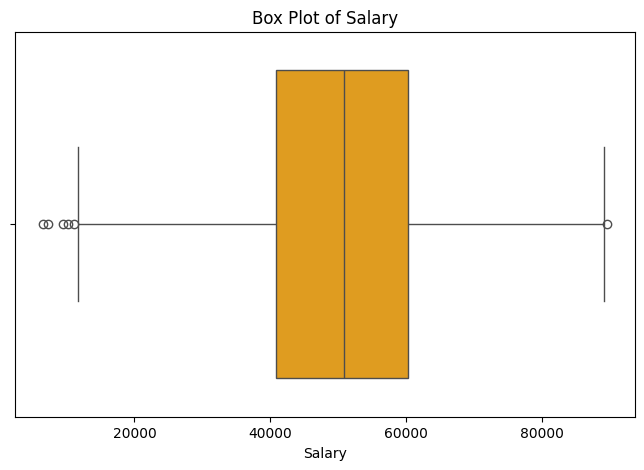

In [8]:
q1 = df['Salary'].quantile(0.25)
q3 = df['Salary'].quantile(0.75)

iqr = q3 - q1

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Salary'], color='orange')
plt.title("Box Plot of Salary")
plt.show()

In [9]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df['Salary'] < lower_bound) | (df['Salary'] > upper_bound)]
outliers

,Age,Salary,Hours_Worked_Per_Week,Years_of_Experience,Salary_With_Outliers
164,54,9546.700356,20,3.951732,9546.700356
186,37,10235.452874,45,2.212721,10235.452874
273,50,89485.730973,54,3.450132,89485.730973
579,68,7271.860691,55,7.668832,7271.860691
619,54,6556.169327,25,1.746992,6556.169327
873,32,11134.365618,56,0.374371,11134.365618


The *z-score* (standard score) is the number of standard deviations by which the value of a data point is above or below the mean value. It is calculated by subtracting the mean from an individual observation and then dividing the difference by the standard deviation:

$$
Z = \frac{x - \mu}{\sigma}
$$

The process of converting a raw score into a standard score is called standardizing: it is a type of normalization that works well when the data is normally distributed.

In [10]:
from scipy.stats import zscore
df['Salary_Z'] = zscore(df['Salary'])
df[['Salary', 'Salary_Z']]

df['Salary_Standardized'] = (df['Salary'] - df['Salary'].mean()) / df['Salary'].std()

## Frequency Distributions

In [11]:
df['Hours_Worked_Per_Week'].value_counts().sort_index().reset_index()

,Hours_Worked_Per_Week,count
0,20,21
1,21,20
2,22,25
3,23,31
4,24,19
5,25,26
6,26,18
7,27,27
8,28,26
9,29,19


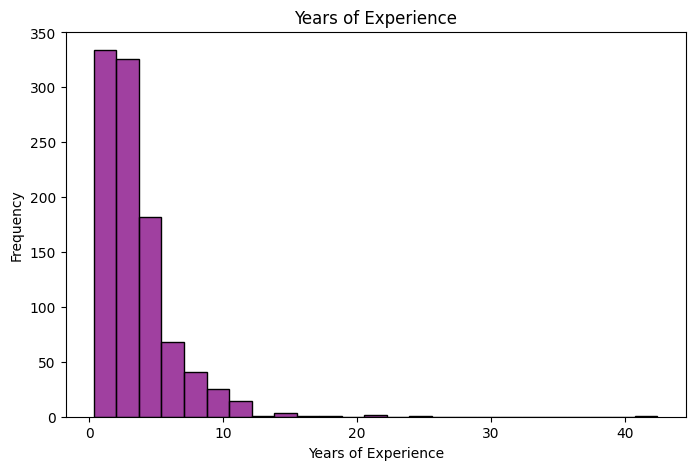

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Years_of_Experience'], bins=25, kde=False, color='purple')
plt.title("Years of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Frequency")
plt.show()

**Skewness** measures the asymmetry of a probability distribution.
- Negative skew: the distribution is left-skewed/left-tailed
- Positive skew: the distribution is right-skewed/right-tailed

Skewness indicates the direction and relative magnitude of a distribution's deviation from the normal distribution (this is important because many statistical methods assume a normal distribution).

**Kurtosis** measures the "tailedness" of a probability distribution, indicating whether data has more or fewer extreme values (outliers) than a normal distribution.

- If the kurtosis is positive, the distribution is *leptokurtic* (heavy tails, more extreme values).
- If the kurtosis is negative the distribution is *platykurtic* (light tails, fewer extreme values).

In [13]:
df['Years_of_Experience'].skew()

np.float64(4.235485788845868)

In [14]:
df['Years_of_Experience'].kurt()

np.float64(38.81309692175205)

When the distribution is right-skewed, the logarithmic trasformation can be useful to make it more symmetric.

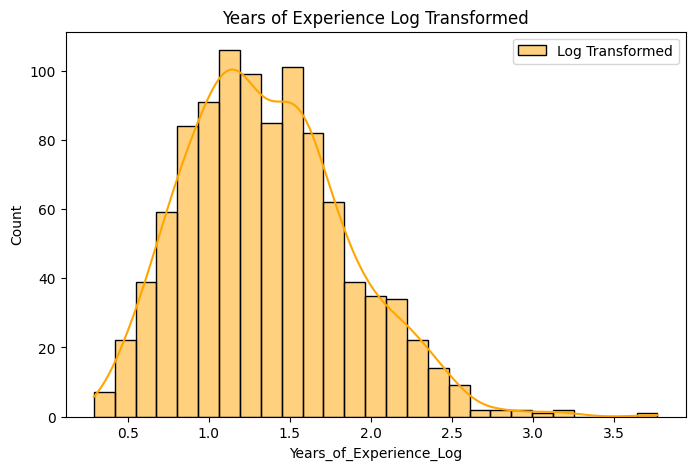

In [15]:
df['Years_of_Experience_Log'] = np.log1p(df['Years_of_Experience'])

# Visualizing the Transformation
plt.figure(figsize=(8, 5))
sns.histplot(df['Years_of_Experience_Log'], kde=True, label='Log Transformed', color='orange')
plt.legend()
plt.title("Years of Experience Log Transformed")
plt.show()

# Introduction to Probability

Probability is a branch of mathematics that measures the likelihood or chance of an event occurring. It quantifies uncertainty and is expressed as a number between 0 and 1.

Key Concepts:
- **Experiment**: A process or action that produces outcomes, such as rolling a die or flipping a coin. Random (with more than one possible outcome, otherwise deterministic) experiments are often conducted repeatedly (ex. rolling a die 2 times), in which case the individual repetitions are called trials.
- **Outcome**: A possible result of an experiment, e.g., rolling a 3 twice on a die.
- **Sample Space**: The set of all possible outcomes of an experiment. For example, for rolling a six-sided die once: {1, 2, 3, 4, 5, 6}; for rolling a six-sided die twice there are 36 possible outcomes: {(1, 1), (1, 2), ...}
- **Event**: A subset of the sample space, representing one or more outcomes. For instance, when rolling a six-sided die once, {2, 4, 6} is the event "rolling an even number".

The **theoretical probability** of an event $A$ occurring is given by:  

$$
P(A) = \frac{\text{Number of favorable outcomes}}{\text{Total number of possible outcomes}}
$$

The **empirical probability** is calculated from observed data in the context of real-world experimentsa and data:  

$$
P(A) = \frac{\text{Number of times A occurs}}{\text{Total number of trials}}
$$

In [16]:
np.random.seed(42)
coin_flips = np.random.choice(['Heads', 'Tails'], size = 100)

np.mean(coin_flips == 'Heads')

np.float64(0.44)

In [17]:
die_rolls = np.random.choice(range(1, 7), size=100)
{i: np.mean(die_rolls == i).item() for i in range(1, 7)}

{1: 0.17, 2: 0.15, 3: 0.16, 4: 0.2, 5: 0.18, 6: 0.14}

## Probability rules

- The probability of any event lies between 0 (impossible event) and 1 (certain event)
- The probability of an event not occurring (its complement) is: $$
P(A^c) = 1 - P(A)
$$  

  This is because the sum of all possible outcomes must be equal to 1.

- The probability of either event $A$ or event $B$ occurring (union) is: $$
P(A \cup B) = P(A) + P(B) - P(A \cap B)
$$

  If $A$ and $B$ are mutually exclusive (they cannot happen together), then:  

$$
P(A \cup B) = P(A) + P(B)
$$

- The probability of both event $A$ or event $B$ occurring (intersection) is: $$
P(A \cap B) = P(A) \times P(B)
$$

  for **independent events** (one does not affect the other) and $$
P(A \cap B) = P(A) \times P(B | A)
$$
  for **dependent events** (one affects the other).

  This means that if $P(B) = P(B | A)$ events $A$ and $B$ are independent, i.e. the occurrence of $B$ does not affect the probability of $A$ and vice versa.

In [18]:
total_cards = 52
red_cards = 26
face_cards = 12
red_and_face_cards = 6

p_not_red = 1 - (red_cards / total_cards)

p_red_or_face = (red_cards / total_cards) + (face_cards / total_cards) - (red_and_face_cards / total_cards)

hearts_cards = 13
diamonds_cards = 13
p_heart_or_diamonds = (hearts_cards / total_cards) + (diamonds_cards / total_cards)

p_two_aces = 4/52 * 3/51

p_ace_two = 4/52 * 4/51

## Conditional probability

**Conditional probability** measures the probability of an event occurring, given that another event is already known (by assumption, evidence etc.) to have occurred: $$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

The **Law of total probability** allows us to calculate the probability of an event $A$ based on its conditional probabilities, given a set of mutually exclusive and exhaustive (at least one must occur) events $B_1, B_2, ..., B_n$.

$$P(A) = P(A|B_1)P(B_1)+P(A|B_2)P(B_2)+\cdots+P(A|B_n)P(B_n)=\sum_{i} P(A | B_i)P(B_i)$$

It is particularly useful when direct computation of an event's probability is challenging.

**Bayes' Theorem** is a mathematical formula used to update the probability of an event based on new evidence. It allows us to calculate conditional probabilities:

$$P(A|B)=\frac{P(B|A)\cdot P(A)}{P(B)}$$







In [19]:
p_rain = 0.3
p_traffic = 0.4
p_traffic_given_rain = 0.7

p_rain_and_traffic = p_rain * p_traffic_given_rain
p_rain_given_traffic = p_rain_and_traffic / p_traffic

In [20]:
p_disease = 0.1
p_positive_given_disease = 0.95
p_positive_given_no_disease = 0.05

# p_disease_given_positive?

p_positive = (p_positive_given_disease * p_disease) + (p_positive_given_no_disease * (1 - p_disease))

p_disease_given_positive = (p_positive_given_disease * p_disease) / p_positive
p_disease_given_positive

0.6785714285714285

# Probability Distributions

A probability distribution is the mathematical function that describes the probabilities of occurrence of possible outcomes of an experiment.

A **discrete** probability distribution is applicable to scenarios where the set of possible outcomes is discrete (e.g. a coin toss, a roll of a die); in this case the discrete probability distribution is known as probability mass function. On the other hand, **continuous** probability distributions are applicable to scenarios where the set of possible outcomes can take on values in a continuous range (e.g. real numbers), such as the temperature on a given day. In the continuous case, probabilities are described by a probability density function, and the probability distribution is by definition the integral of the probability density function.

The **expected value** is a concept in probability theory and statistics that represents the average outcome of a random variable, weighted by the probability of those outcomes. Therefore, it is a weighted average of all possible outcomes.

The **Bernoulli** distribution is the discrete probability distribution of a random variable with a boolean outcome, i.e. which takes the value "success" with probability $p$ and the value "failure" with probability $1-p$ (for example, a coin toss).

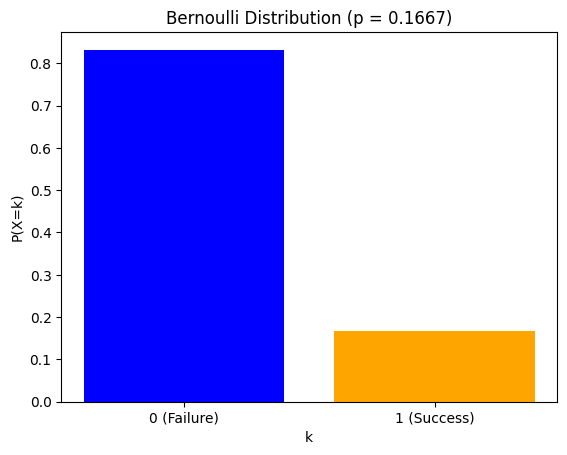


Expected value: 0.17
Variance: 0.14


In [21]:
n = 1
p = 1/6 # success is rolling '3'

experiment_repetitions = 1000
bernoulli_trials = np.random.binomial(n, p, size=experiment_repetitions)

expected_value = p
variance = p * (1-p)

# Visualizing the distribution
unique, counts = np.unique(bernoulli_trials, return_counts=True)
plt.bar(unique, counts/np.sum(counts), color=['blue', 'orange'])
plt.xticks([0, 1], ['0 (Failure)', '1 (Success)'])
plt.title(f"Bernoulli Distribution (p = {p:.4f})")
plt.xlabel("k")
plt.ylabel("P(X=k)")
plt.show()

print(f"\nExpected value: {expected_value:.2f}")
print(f"Variance: {variance:.2f}")

The **binomial** distribution is the discrete probability distribution of the number of successes in a sequence of independent trials, where the result of each trial can be either “success” or “failure”. The Bernoulli is a special case of the Binomial distribution where the number of trials is 1.

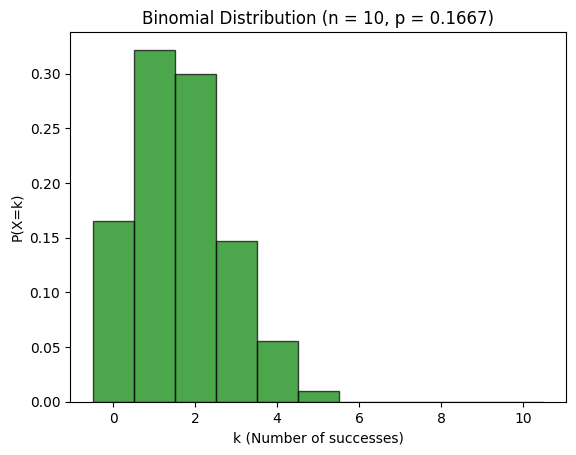


Expected value: 1.67
Variance: 1.39


In [22]:
n = 10
p = 1/6 # success is rolling '3'

experiment_repetitions = 1000
binomial_experiments = np.random.binomial(n, p, size=experiment_repetitions)

expected_value = n * p
variance = n * p * (1-p)

# Visualizing the distribution
plt.hist(binomial_experiments, bins=range(0, n+2), density=True, align='left', color='green', alpha=0.7, edgecolor='black')
plt.title(f"Binomial Distribution (n = {n}, p = {p:.4f})")
plt.xlabel("k (Number of successes)")
plt.ylabel("P(X=k)")
plt.show()

print(f"\nExpected value: {expected_value:.2f}")
print(f"Variance: {variance:.2f}")

The **Poisson** probability distribution is a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time, if these events occur with a known constant mean rate and independently of the time since the last event.


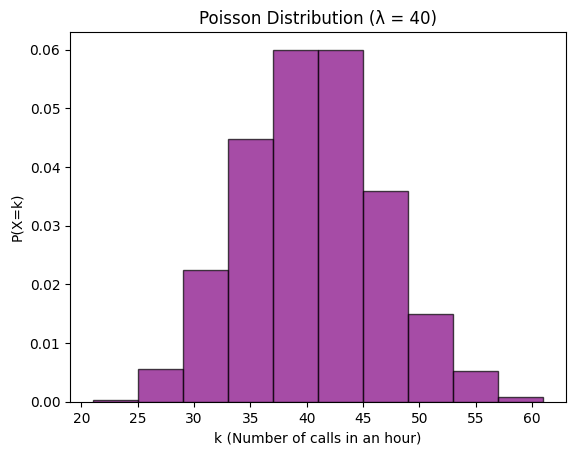


Expected value: 40.00
Variance: 40.00


In [23]:
lambda_ = 40

experiment_repetitions = 1000
poisson_experiments = np.random.poisson(lambda_, size=experiment_repetitions)

expected_value = lambda_
variance = lambda_

plt.hist(poisson_experiments, density=True, color='purple', alpha=0.7, edgecolor='black')
plt.title(f"Poisson Distribution (λ = {lambda_})")
plt.xlabel("k (Number of calls in an hour)")
plt.ylabel("P(X=k)")
plt.show()

print(f"\nExpected value: {expected_value:.2f}")
print(f"Variance: {variance:.2f}")

The **discrete uniform** distribution is a symmetric probability distribution wherein each of the outcome values are equally likely to be observed. This means that every one of the n outcome values has equal probability 1/n.

The **continuous uniform** distribution is a symmetric probability distribution that describes an experiment where there is an arbitrary outcome that lies between certain bounds. All intervals of the same length are equally probable. Therefore, all outcomes are equally likely within a specified range.

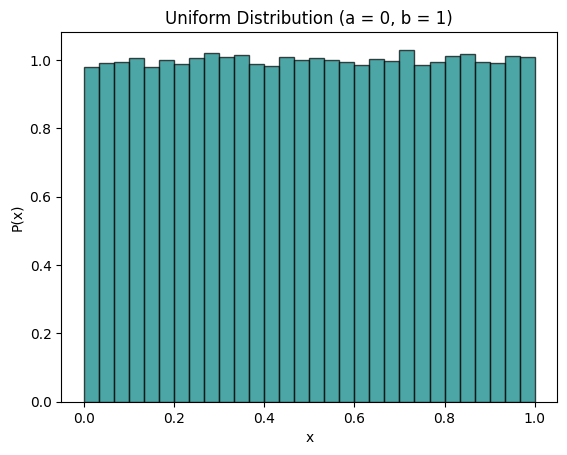

In [24]:
a, b = 0, 1

n_values = 100000
uniform_values = np.random.uniform(low=a, high=b, size=n_values)

expected_value = (a + b) / 2

plt.hist(uniform_values, bins=30, density=True, color='teal', alpha=0.7, edgecolor='black')
plt.title(f"Uniform Distribution (a = {a}, b = {b})")
plt.xlabel("x")
plt.ylabel("P(x)")
plt.show()

The **exponential** distribution is the continuous probability distribution of the distance between events in a Poisson process, i.e. events that occur continuously and independently at a constant average rate (the rate is the probability per unit time).

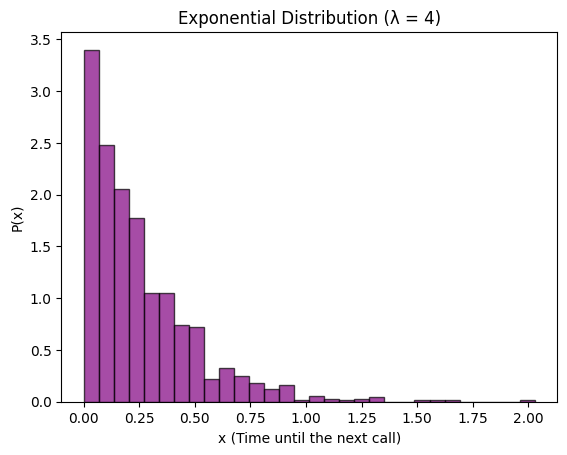

In [25]:
lambda_ = 4 # rate
n_values = 1000

exponential_values = np.random.exponential(scale=1/lambda_, size=n_values)

expected_value = 1/lambda_

plt.hist(exponential_values, density=True, bins=30, color='purple', alpha=0.7, edgecolor='black')
plt.title(f"Exponential Distribution (λ = {lambda_})")
plt.xlabel("x (Time until the next call)")
plt.ylabel("P(x)")
plt.show()

The **normal** distribution is a continuous probability symmetric distribution, characterized by its bell-shaped curve, where most of the values cluster around the mean.


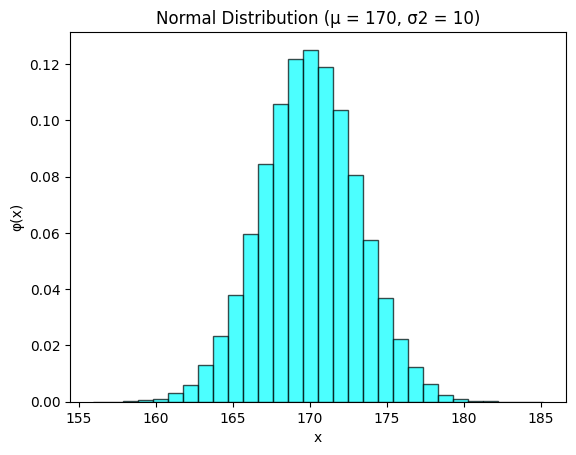

In [26]:
mu, sigma_2 = 170, 10

n_values = 100000
normal_values = np.random.normal(loc=mu, scale=sigma_2**0.5, size=n_values)

expected_value = mu
variance = sigma_2

plt.hist(normal_values, density=True, bins=30, color='cyan', alpha=0.7, edgecolor='black')
plt.title(f"Normal Distribution (μ = {mu}, σ2 = {sigma_2})")
plt.xlabel("x")
plt.ylabel("φ(x)")
plt.show()

# Inferential Statistics

**Inferential statistical** infers properties of a population, for example by testing hypotheses and estimating population parameters (e.g. the mean). It is assumed that the observed data set is sampled from a larger population.

Descriptive statistics on the other hand is only concerned with properties of the observed data, and it does not assume that the data come from a larger population.

## Sampling

A **statistical population** refers to a set of similar items or events which is of interest for some question or experiment. It can be real (e.g. male US citizens) or hypothetical (e.g. the set of all possible hands in a game of poker).

**Sampling** is the selection of a subset (statistical sample) from a statistical population in order to estimate characteristics about the whole population.

The goal is to gather a representative sample, i.e. one that is able to reflect the whole population.

Expected Value (Population Mean): 100.02
Sample Mean: 99.90


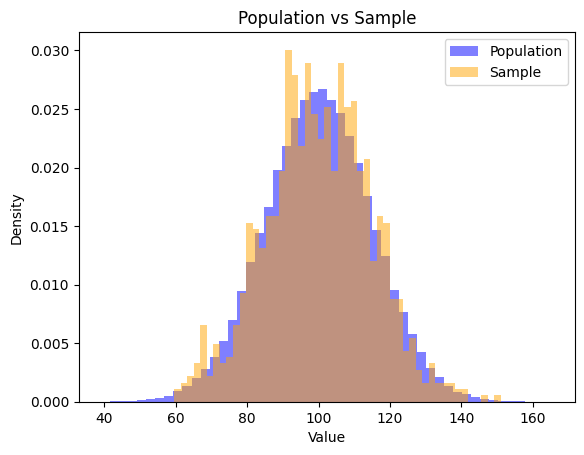

In [27]:
population = np.random.normal(loc=100, scale=15, size=100000)

sample_size = int(0.01 * len(population))
sample = np.random.choice(population, size=sample_size, replace=False)

plt.hist(population, bins=50, alpha=0.5, label='Population', color='blue', density=True)
plt.hist(sample, bins=50, alpha=0.5, label='Sample', color='orange', density=True)
plt.title("Population vs Sample")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()

expected_value = np.mean(population)
sample_mean = np.mean(sample)

print(f"Expected Value (Population Mean): {expected_value:.2f}")
print(f"Sample Mean: {sample_mean:.2f}")

## Law of Large Numbers

The law of large numbers states that given a large sample of independent and identically distributed values, the sample mean converges to the true mean (expected value).

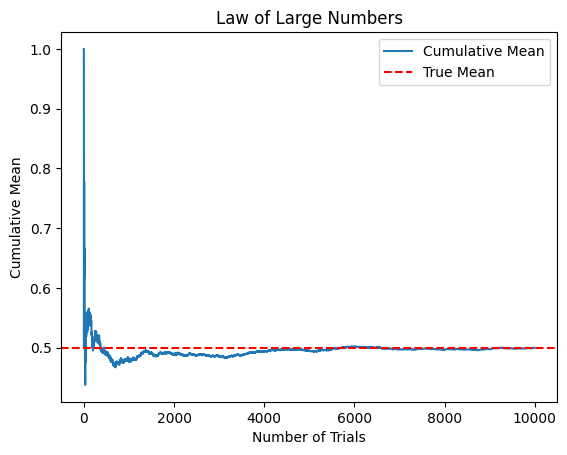

In [28]:
np.random.seed(1)

p = 0.5
n_trials = 10000

results = np.random.choice([0, 1], size=n_trials)
cumulative_mean = np.cumsum(results) / np.arange(1, n_trials + 1)

# Visualizing the convergence
plt.plot(cumulative_mean, label='Cumulative Mean')
plt.axhline(p, color='red', linestyle='--', label='True Mean')
plt.title("Law of Large Numbers")
plt.xlabel("Number of Trials")
plt.ylabel("Cumulative Mean")
plt.legend()
plt.show()

## Monte Carlo methods

Monte Carlo methods are a class of computational algorithms that rely on repeated random sampling to obtain numerical results. They are a good example of the Law of large numbers, because the larger the number of repetitions, the better the approximation tends to be. They are often implemented using computer simulations.

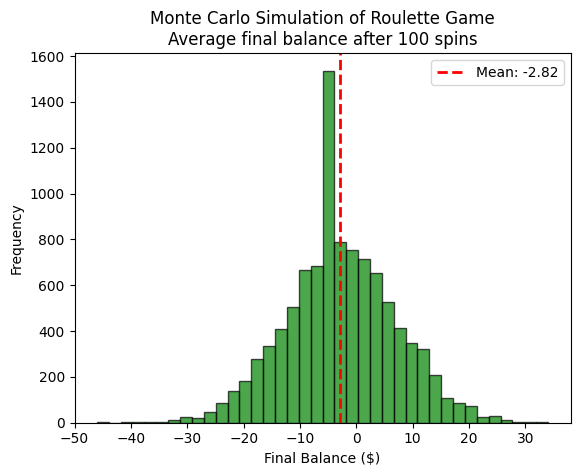

Average balance after 100 spins: $-2.82
Standard deviation of balance: $10.02


In [29]:
# European roulette: 37 slots (0 to 36)

# always bet on black
# initial bet: 1€

def roulette_spin():
    wheel = [i for i in range(0, 37)]
    result = np.random.choice(wheel)
    return result

def play_roulette_game(n_spins):
    
    balance = 0
    bet = 1

    for _ in range(n_spins):
        result = roulette_spin()

        # Bet on 'red' or 'black', which means even numbers or odd numbers
        if result in range(1, 11) or result in range(19, 29):
            #Here even-numbered slots are 'black', odd-numbered are 'red'
            if result % 2 == 0:  # Win condition (black)
                balance += bet
            else:  # Lose condition (red)
                balance -= bet
        elif result in range(11, 19) or result in range(29, 37):
            # Here even-numbered slots are 'red', odd-numbered are 'black'
            if result % 2 != 0:  # Win condition (black)
                balance += bet
            else:  # Lose condition (red)
                balance -= bet
        else:  # Zero
            balance -= bet  # The house wins

    return balance

n_simulations = 10000
n_spins = 100

results = [play_roulette_game(n_spins) for _ in range(n_simulations)]

mean_balance = np.mean(results)
std_dev_balance = np.std(results)

plt.hist(results, bins=38, color='green', alpha=0.7, edgecolor='black')
plt.axvline(mean_balance, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_balance:.2f}')
plt.title(f"Monte Carlo Simulation of Roulette Game\nAverage final balance after {n_spins} spins")
plt.xlabel("Final Balance ($)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

print(f"Average balance after {n_spins} spins: ${mean_balance:.2f}")
print(f"Standard deviation of balance: ${std_dev_balance:.2f}")

## Central Limit Theorem

The **Central Limit Theorem** (CLT) states that the distribution of sample means will approximate a normal distribution as the sample size increases (usually 30 is enough), regardless of the original population's distribution shape.

If we would take many random samples of size $n$ from any population and compute their means, the distribution of those means will be:
approximately normal, centered around the true population mean $\mu$ and with a standard deviation given by $\frac{\sigma}{\sqrt{n}}$, where $\sigma$ is the standard deviation of the population.

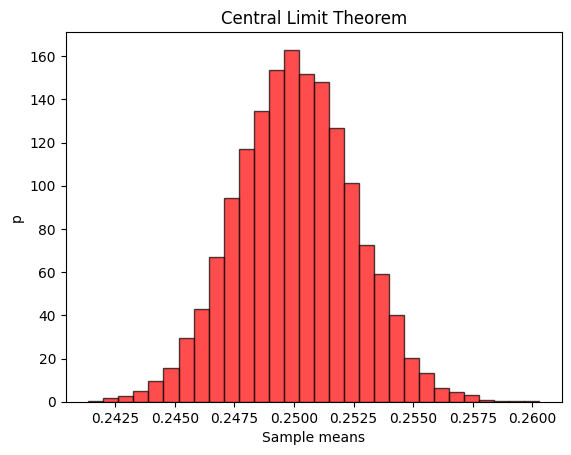

In [30]:
sample_size = 10000
sample_means = [np.mean(np.random.exponential(1/4, sample_size)) for _ in range(10000)]

plt.hist(sample_means, bins=30, density=True, color='red', alpha=0.7, edgecolor='black')
plt.title("Central Limit Theorem")
plt.xlabel("Sample means")
plt.ylabel("p")
plt.show()

## Standard Errors and Confidence Intervals

The **Standard Error** (SE) measures the variability of a sample statistic from the true population parameter. It reflects how much the sample statistic would vary if different samples were drawn from the same population.

It is defined as the standard deviation of the sampling distribution of the statistic. From the CLT we know that the sample means follow a normal distribution with standard deviation $\frac{\sigma}{\sqrt{n}}$, which is then the standard error for the sample mean.

In [31]:
np.random.seed(42)

population = np.random.normal(loc=100, scale=15, size=100000)

def compute_mean_se(sample_size):
    sample = np.random.choice(population, size=sample_size, replace=False)
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)
    standard_error = sample_std / np.sqrt(sample_size)
    return sample_mean, standard_error

sample_sizes = [10, 100, 1000, 10000]

for size in sample_sizes:
    mean, se = compute_mean_se(size)
    print(f"Sample size: {size} | Sample Mean: {mean:.2f} | Standard Error: {se:.2f}")

Sample size: 10 | Sample Mean: 98.61 | Standard Error: 4.58
Sample size: 100 | Sample Mean: 101.15 | Standard Error: 1.50
Sample size: 1000 | Sample Mean: 100.17 | Standard Error: 0.50
Sample size: 10000 | Sample Mean: 100.12 | Standard Error: 0.15


The standard error serves as a crucial component in calculating **confidence intervals**, which provide a range of plausible values for a population parameter, with a specified level of confidence. A confidence interval is computed from the data. Different random samples drawn from the same population produce different confidence intervals. The confidence level is the proportion of CIs that, as the number of samples increases, theoretically contain the true value of the parameter.

In general, the confidence interval for the estimate of a parameter $\theta$ is given by:
$$
\left[ \widehat{\theta} - c_{\alpha} \times \text{SE}(\widehat{\theta}), \quad \widehat{\theta} + c_{\alpha} \times \text{SE}(\widehat{\theta}) \right]
$$
where $c_{\alpha}$ is the critical value of a relevant statistical distribution. The critical value is the point on the probability distribution that corresponds to the desired level of confidence. The critical value is multiplied by the standard error of the sample statistic to calculate the margin of error, which defines how wide or narrow the confidence interval will be.

The choice of the statistical distribution depends on the underlying sampling distribution of the statistic being estimated. We know that for large samples the distribution of sample means is approximately normal, even when the population distribution is not: that's why confidence intervals for the mean use z-values (critical values from a normal distribution).

In [32]:
import scipy.stats as stats

population = np.random.normal(loc=100, scale=15, size=100000)

sample_size = 100000
sample = np.random.choice(population, size=sample_size, replace=False)

sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)
standard_error = sample_std / np.sqrt(sample_size)

confidence_level = 0.95
z_critical = stats.norm.ppf((1 + confidence_level) / 2)
margin_of_error = z_critical * standard_error
ci_lower, ci_upper = sample_mean - margin_of_error, sample_mean + margin_of_error

print(f"Sample Mean: {sample_mean:.2f}")
print(f"95% Confidence Interval: ({ci_lower:.2f}, {ci_upper:.2f})")

Sample Mean: 99.98
95% Confidence Interval: (99.88, 100.07)


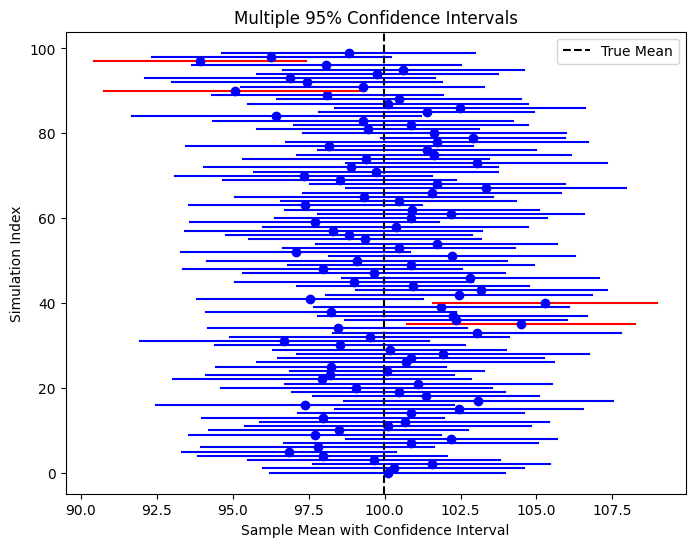

In [33]:
n_simulations = 100  # Number of confidence intervals to generate
sample_size = 50
true_mean = np.mean(population)

plt.figure(figsize=(8, 6))

for i in range(n_simulations):
    sample = np.random.choice(population, size=sample_size, replace=False)
    sample_mean = np.mean(sample)
    standard_error = np.std(sample, ddof=1) / np.sqrt(sample_size)
    margin_of_error = z_critical * standard_error
    ci_lower, ci_upper = sample_mean - margin_of_error, sample_mean + margin_of_error

    # Plot each confidence interval
    plt.plot([ci_lower, ci_upper], [i, i], color='blue' if (ci_lower <= true_mean <= ci_upper) else 'red')
    plt.plot(sample_mean, i, 'bo')  # Sample mean point

# Plot the true population mean as a vertical line
plt.axvline(true_mean, color='black', linestyle="--", label="True Mean")
plt.xlabel("Sample Mean with Confidence Interval")
plt.ylabel("Simulation Index")
plt.title("Multiple 95% Confidence Intervals")
plt.legend()
plt.show()

## Bootstrap

The bootstrap is a resampling method used to estimate the distribution of a statistic by repeatedly drawing samples with replacement from the original data.

Bootstrapping does not require assumptions about the distribution of the data, making it useful for non-normal data (or in general when the distribution is complex/unknown). It also provides better estimates than traditional theorethical methods when the sample size is small.

It can be used for e.g. to construct confidence intervals and estimating the standard error of a statistic when traditional methods are not applicable.

In [34]:
np.random.seed(42)

lambda_param = 1 / 3
data = np.random.exponential(scale=1/lambda_param, size=100)

def bootstrap_resample(data, statistic_func, n_bootstrap_samples):
    bootstrap_stats = []
    n = len(data)
    for _ in range(n_bootstrap_samples):
        sample = np.random.choice(data, size=n, replace=True)
        bootstrap_stats.append(statistic_func(sample))
    return np.array(bootstrap_stats)

n_bootstrap_samples = 10000
bootstrap_medians = bootstrap_resample(data, np.median, n_bootstrap_samples)

standard_error = np.std(bootstrap_medians)
ci_lower = np.percentile(bootstrap_medians, 2.5)
ci_upper = np.percentile(bootstrap_medians, 97.5)

print(f"Bootstrap Standard Error: {standard_error:.3f}")
print(f"95% Bootstrap Confidence Interval: [{ci_lower:.3f}, {ci_upper:.3f}]")

Bootstrap Standard Error: 0.345
95% Bootstrap Confidence Interval: [1.193, 2.520]


## Hypothesis Testing

A statistical hypothesis test is used to test whether the data sufficiently supports a particular hypothesis. In particular, it helps determine whether an observed effect is **statistically significant** or if it could have occurred by random chance.

First, we define the **null** and **alternative** hypotheses. Typically, the alternative hypothesis $H_a$ simply posits that the null hypothesis $H_0$ does not hold. In order to find evidence for or against the null hypothesis, we compute a **test statistic** T. The **p-value** is defined as the probability of observing a test statistic equal to or more extreme than the observed statistic, under the assumption that $H_0$ is true. Therefore, a small p-value provides evidence for rejecting $H_0$. Typical threshold to reject $H_0$ are 0.05 and 0.01.

A **one-tailed** test looks for statistical significance only on one tail of the distribution and thus we typically frame our null and alternative hypotheses using inequalities.

In a **two-tailed** test, we frame null and alternative hypothesis in an “equal” and “not equal” structure. This means we spread our p-value statistical significance threshold to both tails, not just one. This means the two-tailed test makes it harder to reject the null hypothesis and demands stronger evidence to pass a test.

There are numerous types of significance tests, depending on the type of data, how many samples there are, and what’s being measured. A very common one is the **t-test**, used for the comparison tests in which the data is numeric.

Failed to reject H0


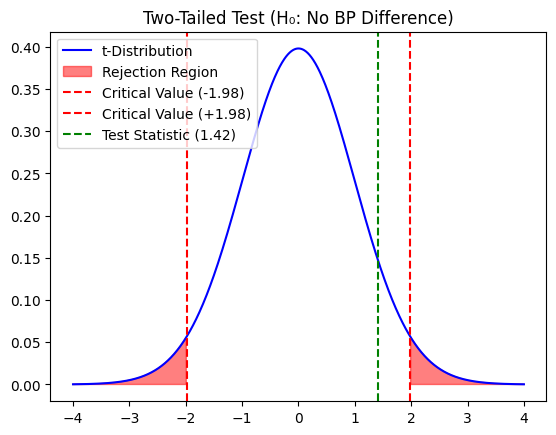

In [35]:
np.random.seed(42)

sample_size = 50

# H0: the treatment has no effect on blood pressure
# H1: the treatment has effect on blood pressure

placebo_group = np.random.normal(loc=120, scale=10, size=sample_size)
treatment_group = np.random.normal(loc=115, scale=10, size=sample_size)

t_stat, p_value = stats.ttest_ind(placebo_group, treatment_group)

alpha = 0.05
if p_value < alpha:
    print("Reject H0")
else:
    print("Failed to reject H0")

x = np.linspace(-4, 4, 1000)
pdf = stats.t.pdf(x, df=len(placebo_group) + len(treatment_group) - 2)  # t-distribution

# Critical values
t_critical_two_tailed = stats.t.ppf(1 - alpha / 2, df=len(placebo_group) + len(treatment_group) - 2)

# Plot two-tailed test
plt.plot(x, pdf, label="t-Distribution", color="blue")
plt.fill_between(x, pdf, where=(x <= -t_critical_two_tailed) | (x >= t_critical_two_tailed),
                 color="red", alpha=0.5, label="Rejection Region")
plt.axvline(-t_critical_two_tailed, color="red", linestyle="--", label=f"Critical Value (-{t_critical_two_tailed:.2f})")
plt.axvline(t_critical_two_tailed, color="red", linestyle="--", label=f"Critical Value (+{t_critical_two_tailed:.2f})")
plt.axvline(t_stat, color="green", linestyle="--", label=f"Test Statistic ({t_stat:.2f})")
plt.title("Two-Tailed Test (H₀: No BP Difference)")
plt.legend()

Failed to reject H0


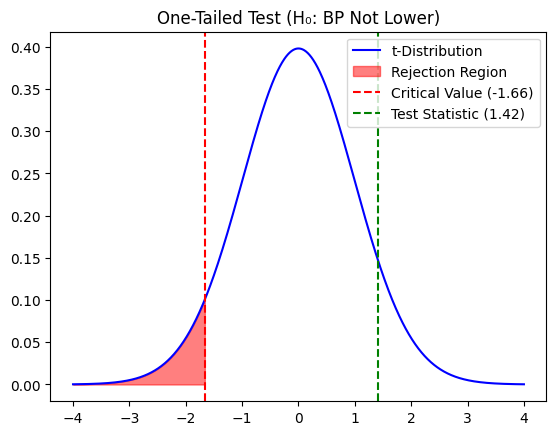

In [36]:
p_value_one_tailed = p_value / 2

alpha = 0.05
if p_value_one_tailed < alpha:
    print("Reject H0")
else:
    print("Failed to reject H0")

t_critical_one_tailed = stats.t.ppf(1 - alpha, df=len(placebo_group) + len(treatment_group) - 2)

plt.plot(x, pdf, label="t-Distribution", color="blue")
plt.fill_between(x, pdf, where=(x <= -t_critical_one_tailed), color="red", alpha=0.5, label="Rejection Region")
plt.axvline(-t_critical_one_tailed, color="red", linestyle="--", label=f"Critical Value ({-t_critical_one_tailed:.2f})")
plt.axvline(t_stat, color="green", linestyle="--", label=f"Test Statistic ({t_stat:.2f})")
plt.title("One-Tailed Test (H₀: BP Not Lower)")
plt.legend()

If we erroneously reject $H_0$ when it is true, we have a **Type I error**. If we do not reject $H_0$ when it is in false, we have a **Type II error**. The **power** of the hypothesis test is defined as the probability of not making a Type II error given that $H_a$ holds, i.e., the probability of correctly rejecting $H_0$.

In [37]:
import statsmodels.stats.power as smp

# Power analysis for t-test
effect_size = 0.5  # Medium effect size
alpha = 0.05
power = 0.8

# Compute required sample size
sample_size = smp.tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, alternative='two-sided')
sample_size_one_sided = smp.tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, alternative='larger')

print(f"Required sample size for 80% power: {sample_size:.0f}")
print(f"Required sample size for 80% power in the one-sided case: {sample_size_one_sided:.0f}") 

Required sample size for 80% power: 64
Required sample size for 80% power in the one-sided case: 50


The statistical procedure that tests for a statistically significant difference among multiple groups is called analysis of variance, or ANOVA. Just like the t-test can be used for comparing the mean of two groups, there is a statistical test for ANOVA based on the F-statistic. 

In [38]:
np.random.seed(42)

diet_1 = np.random.normal(loc=5, scale=2, size=30)
diet_2 = np.random.normal(loc=6, scale=2, size=30)
diet_3 = np.random.normal(loc=7, scale=2, size=30)

f_stat, p_value_anova = stats.f_oneway(diet_1, diet_2, diet_3)

print(f"ANOVA F-statistic: {f_stat:.3f}, p-value: {p_value_anova:.3f}")

ANOVA F-statistic: 12.210, p-value: 0.000


The chi-square test is used with count data to test how well it fits some expected distribution. The most common use is with a contingency tables, to assess whether the null hypothesis of independence among variables is reasonable.

In [39]:
from scipy.stats import chi2_contingency

observed = np.array([[50, 30],
                     [20, 60]])

# male: 50 voted A, 30 voted B
# female: 20 voted A, 60 voted B

chi2, p_value, _, _, = chi2_contingency(observed)

# Interpret results
if p_value < 0.05:
    print("Reject H₀: There is a significant association between gender and voting preference.")
else:
    print("Fail to reject H₀: No significant association detected.")

Reject H₀: There is a significant association between gender and voting preference.


# Correlation

## Linear vs Monotonic Correlation

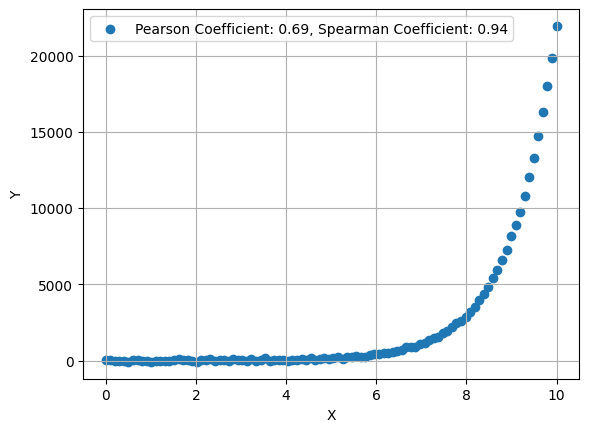

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

# Create a dataset with a monotonic but non-linear relationship
x = np.linspace(0, 10, 100)
y = np.exp(x) + np.random.normal(0, 50, size=len(x))  # Exponential relationship with noise

# Calculate Pearson and Spearman coefficients
pearson_coeff, _ = pearsonr(x, y)
spearman_coeff, _ = spearmanr(x, y)

# Plot the data
plt.scatter(x, y, label=f'Pearson Coefficient: {pearson_coeff:.2f}, Spearman Coefficient: {spearman_coeff:.2f}')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

## Exercises

1) Write a Python function that determines if the distribution of a pandas Series is symmetric, right-skewed or left-skewed.

In [41]:
def determine_distribution_type(input_values):
    if input_values.mean() > input_values.median():
        return "Right-skewed"
    elif input_values.mean() < input_values.median():
        return "Left-skewed"
    else:
        return "Symmetric"

2) A disease affects 2% of a population. The population is divided into three age groups:
	•	Young (50%): False positive rate 3%, sensitivity 95%.
	•	Middle-aged (30%): False positive rate 4%, sensitivity 90%.
	•	Elderly (20%): False positive rate 5%, sensitivity 85%.

    N.B.
    False positive rate: probability of a person testing positive when they do not have the disease.
    Sensitivity/True positive rate: probability of a person testing positive when they have the disease.

    If a random person from the population tests positive, what is the probability they actually have the disease?

In [42]:
P_D = 0.02  # prior
P_not_D = 1 - P_D 

# Population distribution
P_Young = 0.5
P_Middle = 0.3
P_Elderly = 0.2

# Sensitivity (True positive rate)
P_Pos_given_D_Young = 0.95
P_Pos_given_D_Middle = 0.90
P_Pos_given_D_Elderly = 0.85

# False positive rates
P_Pos_given_not_D_Young = 0.03
P_Pos_given_not_D_Middle = 0.04
P_Pos_given_not_D_Elderly = 0.05

# Law of Total Probability
P_Pos = (
    P_Young * (P_Pos_given_D_Young * P_D + P_Pos_given_not_D_Young * P_not_D) +
    P_Middle * (P_Pos_given_D_Middle * P_D + P_Pos_given_not_D_Middle * P_not_D) +
    P_Elderly * (P_Pos_given_D_Elderly * P_D + P_Pos_given_not_D_Elderly * P_not_D)
)

# Applying Bayes' Theorem
P_D_given_Pos = (
    (P_Young * P_Pos_given_D_Young * P_D) +
    (P_Middle * P_Pos_given_D_Middle * P_D) +
    (P_Elderly * P_Pos_given_D_Elderly * P_D)
) / P_Pos

print(f"P(Disease | Positive Test) = {P_D_given_Pos:.3f}")

P(Disease | Positive Test) = 0.335
